In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt


dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])


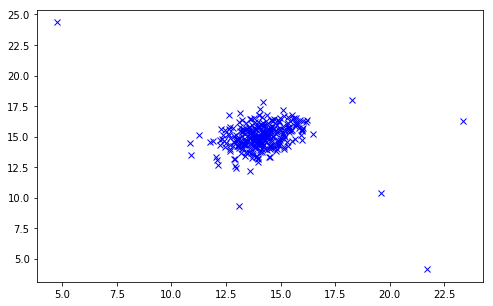

In [6]:
mat = loadmat('ex8data1.mat')
print(mat.keys())
# dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])
X = mat['X']
Xval, yval = mat['Xval'], mat['yval']
X.shape, Xval.shape, yval.shape
# ((307, 2), (307, 2), (307, 1))
def plot_data(X):
    plt.figure(figsize=(8,5))
    plt.plot(X[:,0], X[:,1], 'bx')
    #plt.scatter(Xval[:,0], Xval[:,1], c=yval.flatten(), marker='x', cmap='rainbow')
    



In [30]:
mu=np.mean(X,axis=0)
sigma2=((X-mu).T @ (X-mu)) / len(X)

In [45]:
def gaussian(X,mu,sigma2):
    m,n=X.shape
    norm=1/(np.power((2*np.pi),n/2)*np.sqrt(np.linalg.det(sigma2)))
    exp=np.diag(np.exp(-0.5*(X-mu)@np.linalg.inv(sigma2)@(X-mu).T))
    return norm*exp

In [59]:
m,n=X.shape
norm=1/(np.power((2*np.pi),n/2)*np.sqrt(np.linalg.det(sigma2)))
exp=np.diag(np.exp(-0.5*(X-mu)@np.linalg.inv(sigma2)@(X-mu).T))
(norm*exp).shape

(307,)

In [65]:
def plotContours(mu, sigma2):
    """
    画出高斯概率分布的图，在三维中是一个上凸的曲面。投影到平面上则是一圈圈的等高线。
    """
    delta = .3  # 注意delta不能太小！！！否则会生成太多的数据，导致矩阵相乘会出现内存错误。
    x = np.arange(0,30,delta)
    y = np.arange(0,30,delta)
    
    # 这部分要转化为X形式的坐标矩阵，也就是一列是横坐标，一列是纵坐标，
    # 然后才能传入gaussian中求解得到每个点的概率值
    xx, yy = np.meshgrid(x, y)
    points = np.c_[xx.ravel(), yy.ravel()]  # 按列合并，一列横坐标，一列纵坐标
    z = gaussian(points, mu, sigma2)
    z = z.reshape(xx.shape)  # 这步骤不能忘
    
    cont_levels = [10**h for h in range(-20,0,3)]
    plt.contour(xx, yy, z, cont_levels)  # 这个levels是作业里面给的参考,或者通过求解的概率推出来。

    plt.title('Gaussian Contours',fontsize=16)


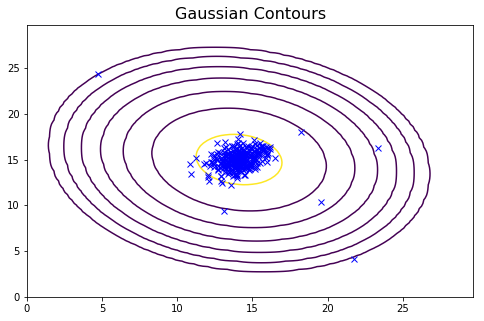

In [66]:
plot_data(X)
plotContours(mu,sigma2)

In [67]:
def selectThreshold(yval, pval):
    def computeF1(yval, pval):
        m = len(yval)
        tp = float(len([i for i in range(m) if pval[i] and yval[i]]))
        fp = float(len([i for i in range(m) if pval[i] and not yval[i]]))
        fn = float(len([i for i in range(m) if not pval[i] and yval[i]]))
        prec = tp/(tp+fp) if (tp+fp) else 0
        rec = tp/(tp+fn) if (tp+fn) else 0
        F1 = 2*prec*rec/(prec+rec) if (prec+rec) else 0
        return F1
   
    epsilons = np.linspace(min(pval), max(pval), 1000)
    bestF1, bestEpsilon = 0, 0
    for e in epsilons:
        pval_ = pval < e
        thisF1 = computeF1(yval, pval_)
        if thisF1 > bestF1:
            bestF1 = thisF1
            bestEpsilon = e

    return bestF1, bestEpsilon


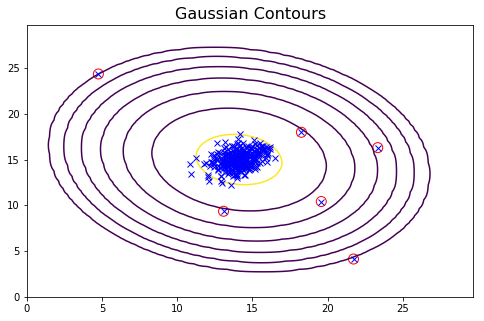

In [75]:
pval=gaussian(Xval,mu,sigma2)
bestF1, bestEpsilon = selectThreshold(yval,pval)
y = gaussian(X, mu, sigma2)  # X的概率
xx = np.array([X[i] for i in range(len(y)) if y[i] < bestEpsilon])
plot_data(X)
plotContours(mu, sigma2)
plt.scatter(xx[:,0], xx[:,1], s=100, facecolors='none', edgecolors='r')
